In [1]:
import ppplot
from ppclass import pp
import numpy as np
%matplotlib inline

In [2]:
import matplotlib.pyplot as mpl
mpl.rcParams['font.family'] = "times" # for good log major/minor ticks
mpl.rcParams['lines.linewidth'] = 3.0

/home/aspiga/soft/planetoplot/modules/ppplot.py:296: RuntimeWarning: invalid value encountered in less
  else:          what_I_plot[ what_I_plot < zevmin*(1.+small_enough) ] = zevmin*(1.+small_enough)
/home/aspiga/soft/planetoplot/modules/ppplot.py:297: RuntimeWarning: invalid value encountered in greater
  what_I_plot[ what_I_plot > miss  ] = -miss
/home/aspiga/soft/planetoplot/modules/ppplot.py:298: RuntimeWarning: invalid value encountered in greater
  what_I_plot[ what_I_plot > zevmax ] = zevmax*(1.-small_enough)
/home/aspiga/soft/conda/miniconda2/envs/py2/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'times'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


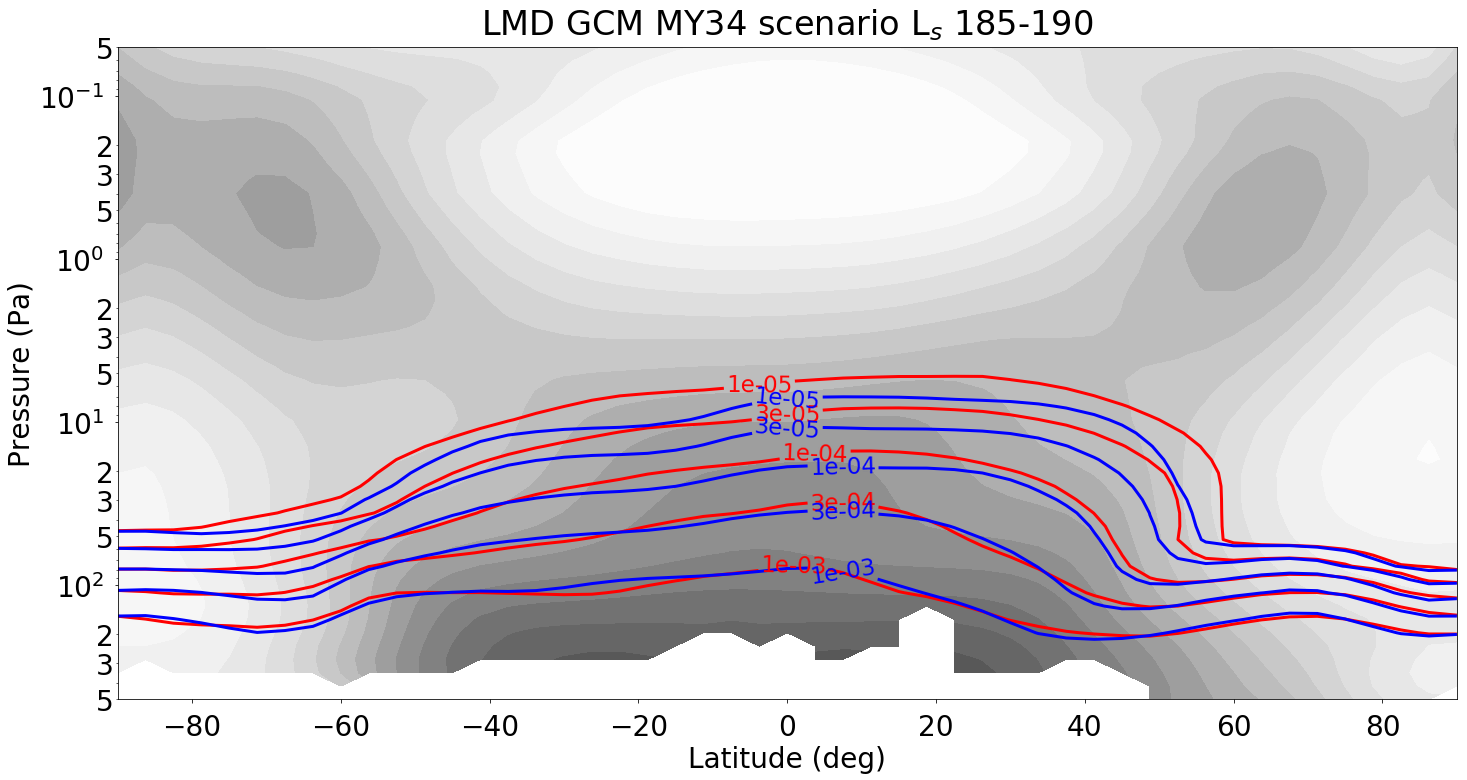

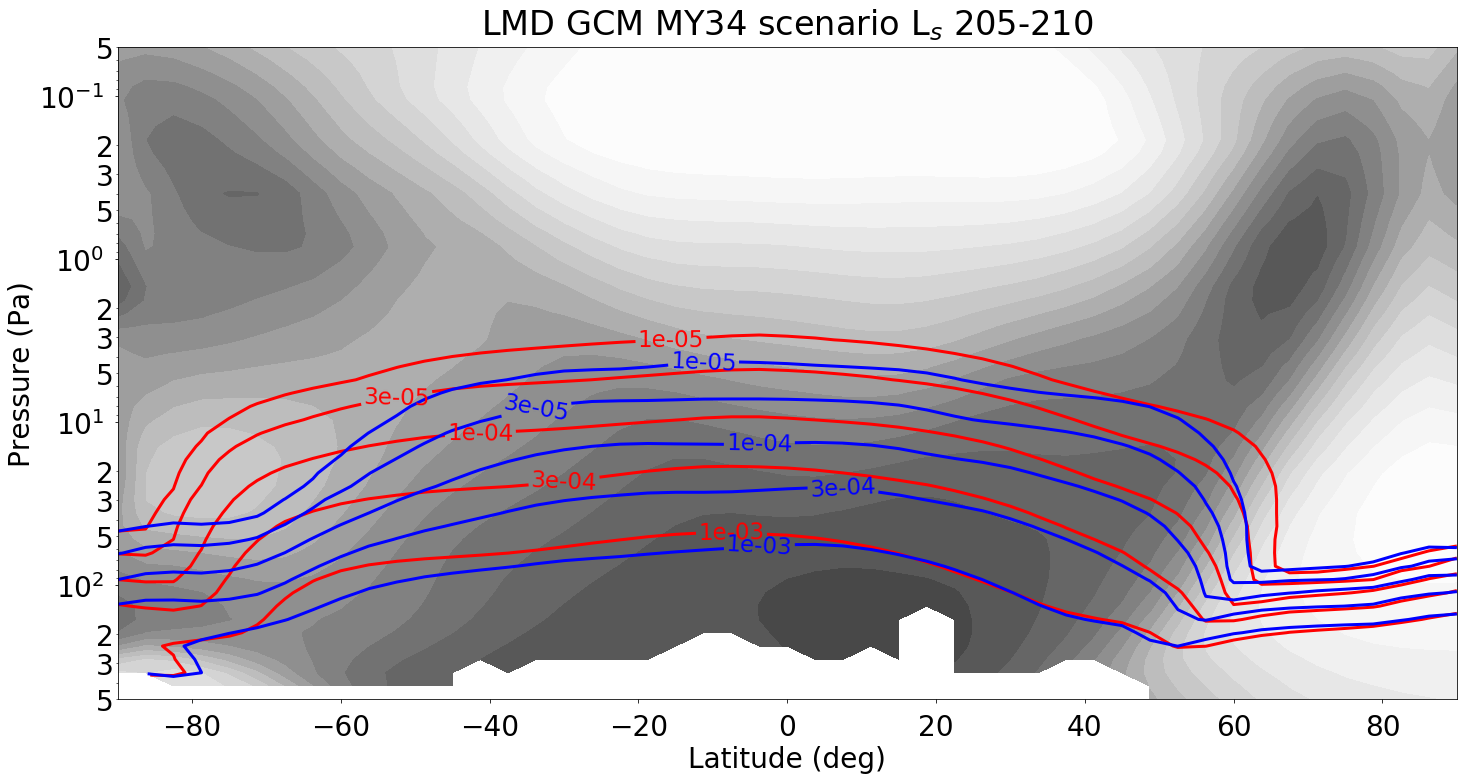

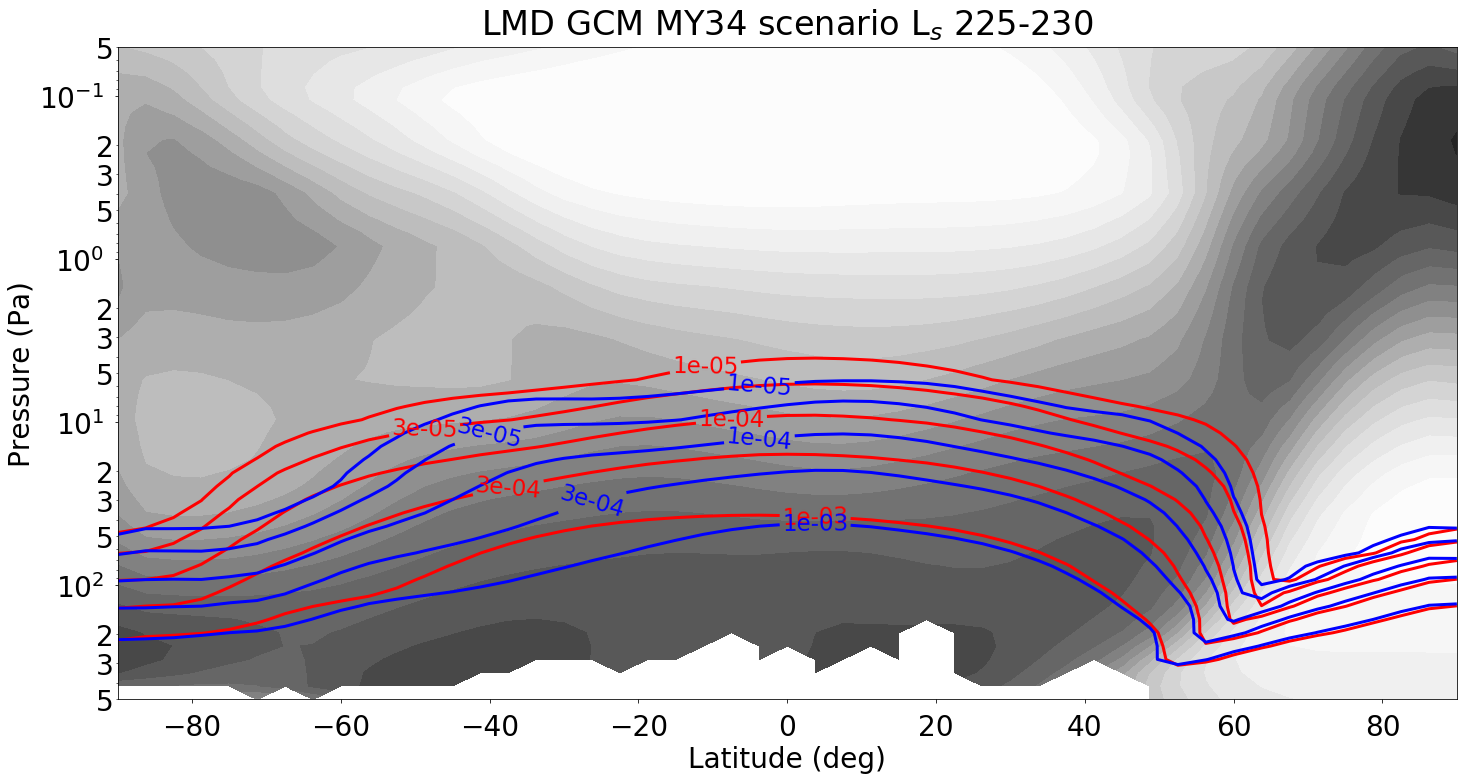

In [3]:
#tpltab = [("r_diagfi180_210","185,190"),\
#          ("r_diagfi180_210","205,210"),\
#          ("r_diagfi210_240","225,230")]
#xxx = "-180,180"

tpltab = [("rrr_diagfi180_210","185,190"),\
          ("rrr_diagfi180_210","205,210"),\
          ("rrr_diagfi210_240","225,230")]
xxx = 0

levs = [1e-5,1e-4,1e-3]
levs = [1e-5,3e-5,1e-4,3e-4,1e-3]
        
for tpl in tpltab:

        prefix, ttt = tpl[0], tpl[1]
        
        #ffd,xx,yy,zz,tt = pp(file=prefix+"_LT15_P_Ls.nc",var="dustq",x=xxx,t=ttt).getfd()
        #ffn,xx,yy,zz,tt = pp(file=prefix+"_LT3_P_Ls.nc",var="dustq",x=xxx,t=ttt).getfd()
    
        rhod,xx,yy,zz,tt = pp(file=prefix+"_LT15_P_Ls.nc",var="rho",x=xxx,t=ttt,kind3d="tzy").getfd()
        rhon,xx,yy,zz,tt = pp(file=prefix+"_LT3_P_Ls.nc",var="rho",x=xxx,t=ttt,kind3d="tzy").getfd()

        ttd = pp(file=prefix+"_LT15_P_Ls.nc",var="temp",x=xxx,t=ttt,kind3d="tzy").getf()
        ttn = pp(file=prefix+"_LT3_P_Ls.nc",var="temp",x=xxx,t=ttt,kind3d="tzy").getf()
        tt = (ttd + ttn)/2.
        tt = ttn

        dsod = pp(file=prefix+"_LT15_P_Ls.nc",var="dsodust",x=xxx,t=ttt,kind3d="tzy").getf()
        dson = pp(file=prefix+"_LT3_P_Ls.nc",var="dsodust",x=xxx,t=ttt,kind3d="tzy").getf()

        dsod = rhod*dsod # opacity in km-1
        dson = rhon*dson # opacity in km-1

        #### -- in case dsodust is TES
        #### TES x 2.6 = VIS ~~~ VIS / MCS = 7.3 ~~~ fac = MCS/TES = 2.6/7.3
        ##fac = 2.6/7.3
        ### -- here dsodust is MCS, OK
        fac = 1.0

        ppplot.changefont(28)
        fig = ppplot.figuref(x=24,y=12)
        pl = ppplot.plot2d(fig=fig)
        pl.f = tt
        pl.x, pl.y = yy, zz
        pl.xlabel, pl.ylabel = "Latitude (deg)", "Pressure (Pa)"
        pl.colorbar = "Greys"
        pl.vmin, pl.vmax = 130, 250
        pl.showcb = False
        pl.logy = True

        pl.c = dsod*fac ; pl.ccol = "r" 
        pl.clab = True
        pl.clev = levs ; pl.cfmt = "%.0e"
        pl.make()

        pl.c = dson*fac ; pl.ccol = "b"
        pl.invert = True
        rrr = ttt.replace(",","-")
        pl.title = r'LMD GCM MY34 scenario L$_s$ '+rrr
        pl.make()
        
        ppplot.save(mode="png",filename="LMD_GCM_"+rrr)